In [1]:
#Fashion-MNIST Image Classification with CNN


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.19.0


In [3]:
# Load the Fashion-MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Class names for visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")
print(f"Number of classes: {len(class_names)}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Number of classes: 10


In [4]:
# Normalize the images to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape to add channel dimension (grayscale: 1 channel)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

print(f"Preprocessed training data shape: {train_images.shape}")
print(f"Min pixel value: {train_images.min()}, Max: {train_images.max()}")

Preprocessed training data shape: (60000, 28, 28, 1)
Min pixel value: 0.0, Max: 1.0


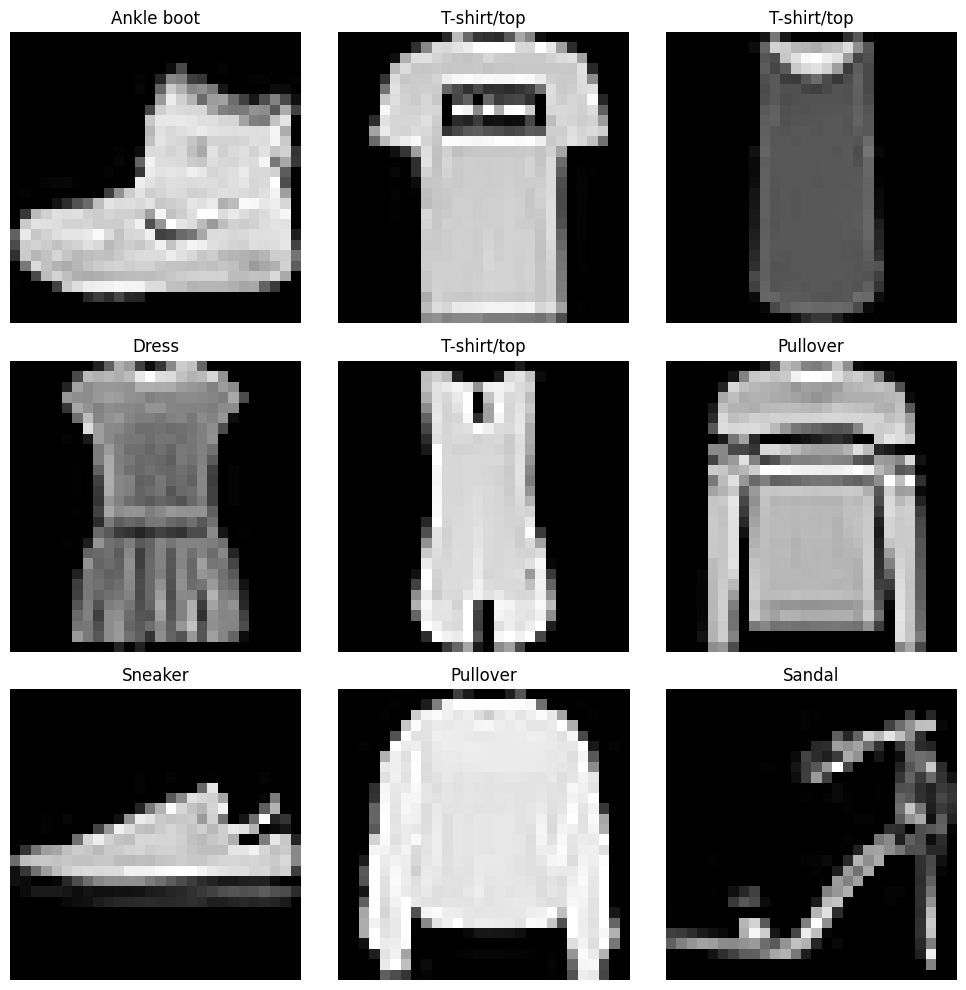

In [5]:
# Plot the first 9 images from training set
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i].squeeze(), cmap='gray')  # Squeeze to remove channel dim for plotting
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
model = keras.Sequential([
    # First Conv Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Regularization to prevent overfitting
    layers.Dense(10, activation='softmax')  # 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # For integer labels
              metrics=['accuracy'])

# Summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(train_images, train_labels,
                    epochs=20,
                    validation_split=0.2,  # Use 20% of training data for validation
                    batch_size=128,
                    verbose=1)

# Save the trained model for later use (e.g., in your app)
model.save('fashion_mnist_model.h5')
print("Model saved as 'fashion_mnist_model.h5'")

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5623 - loss: 1.2065 - val_accuracy: 0.8098 - val_loss: 0.5070
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7812 - loss: 0.5963 - val_accuracy: 0.8410 - val_loss: 0.4210
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8158 - loss: 0.5076 - val_accuracy: 0.8655 - val_loss: 0.3679
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8453 - loss: 0.4369 - val_accuracy: 0.8702 - val_loss: 0.3503
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8561 - loss: 0.4048 - val_accuracy: 0.8809 - val_loss: 0.3232
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8680 - loss: 0.3764 - val_accuracy: 0.8872 - val_loss: 0.3068
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8761 - loss: 0.3548 - val_accuracy: 0.8892 - val_loss: 0.3010
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8792 - loss: 0.3399 - val_accuracy: 0.

Model saved as 'fashion_mnist_model.h5'


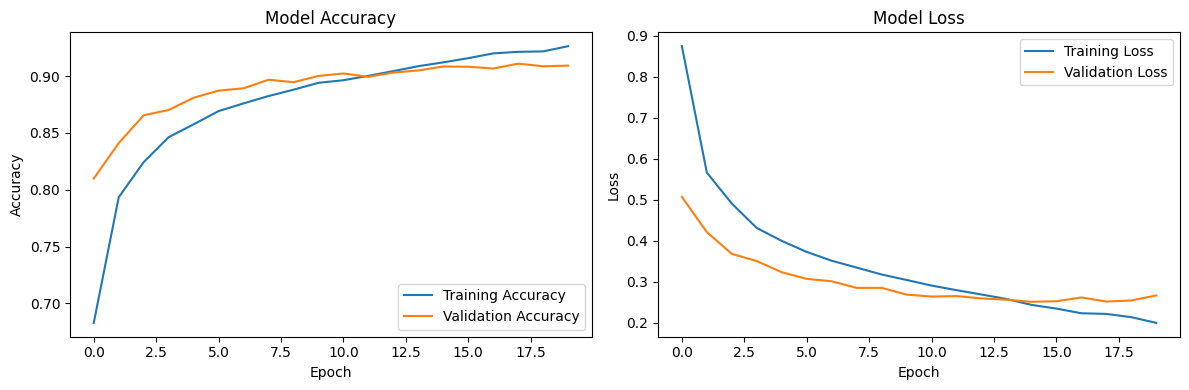

Test Accuracy: 0.9053 (90.53%)


In [8]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


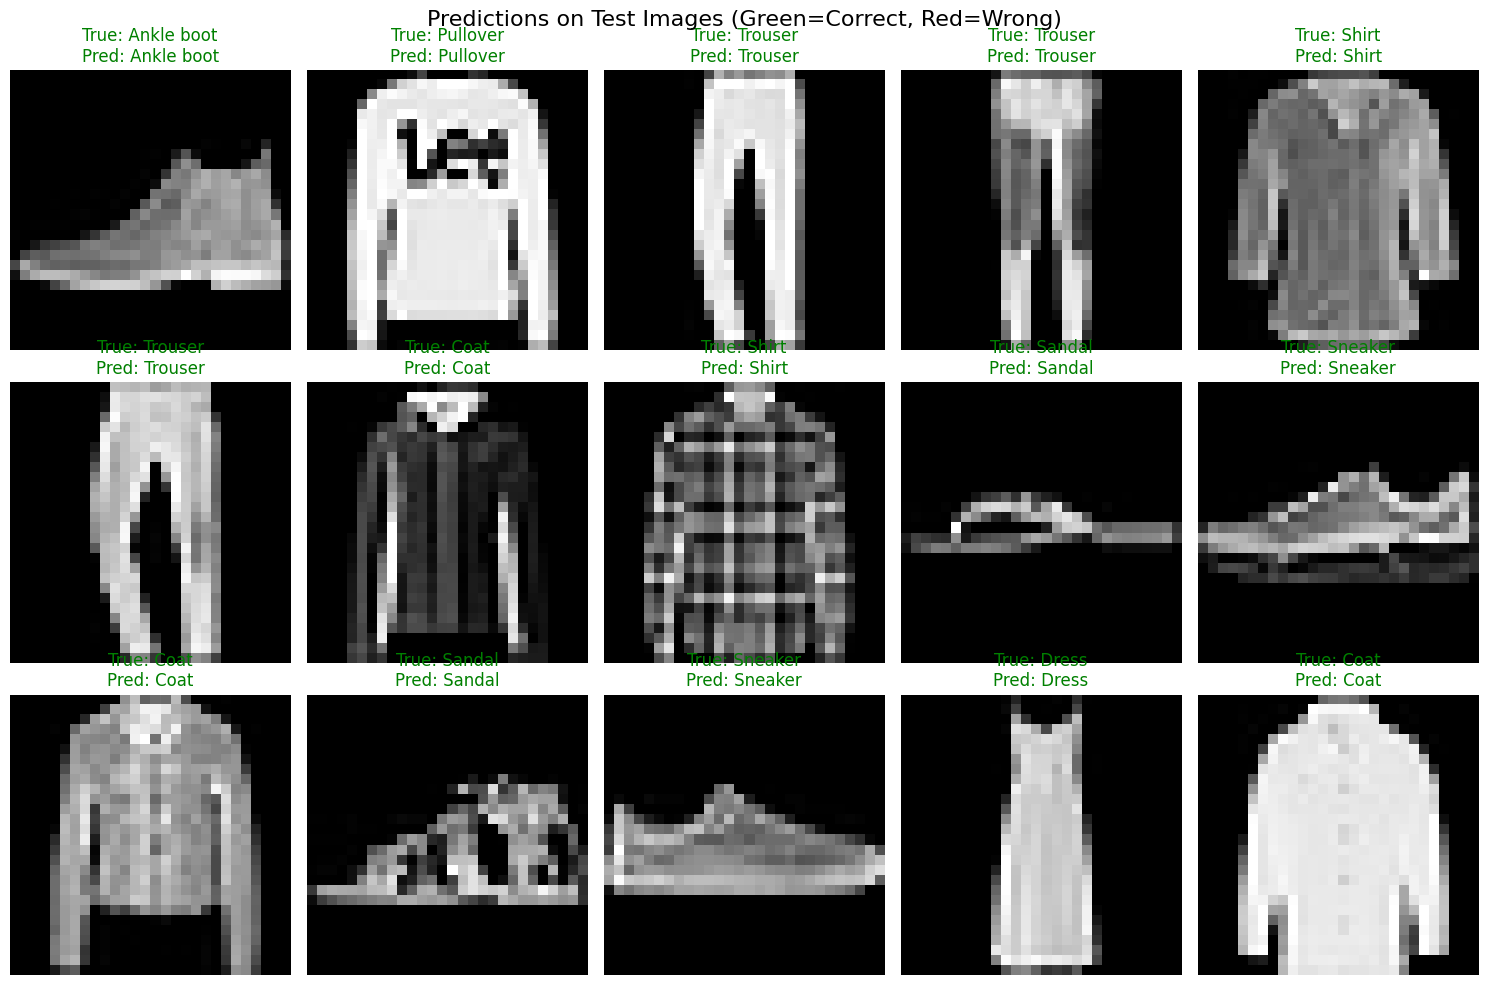

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.84      0.86      1000
     Trouser       1.00      0.97      0.99      1000
    Pullover       0.81      0.90      0.85      1000
       Dress       0.90      0.92      0.91      1000
        Coat       0.87      0.84      0.86      1000
      Sandal       0.96      0.99      0.97      1000
       Shirt       0.74      0.71      0.72      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.99      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



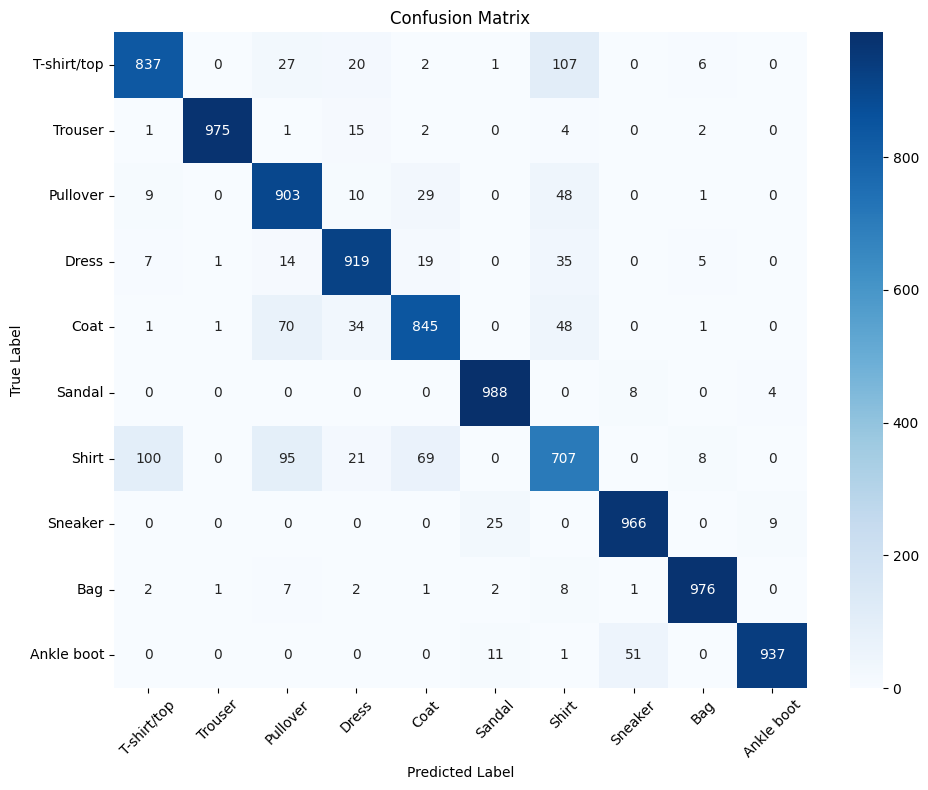

In [9]:
# Make predictions on test set
test_predictions = model.predict(test_images)
predicted_labels = np.argmax(test_predictions, axis=1)

# Visualize predictions for first 15 test images
plt.figure(figsize=(15, 10))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(test_images[i].squeeze(), cmap='gray')
    true_label = class_names[test_labels[i]]
    pred_label = class_names[predicted_labels[i]]
    color = 'green' if true_label == pred_label else 'red'
    plt.title(f'True: {true_label}\nPred: {pred_label}', color=color)
    plt.axis('off')
plt.suptitle('Predictions on Test Images (Green=Correct, Red=Wrong)', fontsize=16)
plt.tight_layout()
plt.show()

# Overall classification report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels, target_names=class_names))

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(test_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: Ankle boot
Confidence: 100.00%


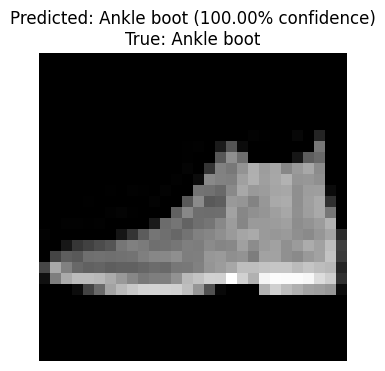

In [10]:
# Example: Predict on a single test image (e.g., index 0)
single_image = test_images[0:1]  # Batch of 1
single_prediction = model.predict(single_image)
predicted_class = class_names[np.argmax(single_prediction[0])]
confidence = np.max(single_prediction[0]) * 100

print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.2f}%")

# Plot the image
plt.figure(figsize=(4, 4))
plt.imshow(single_image[0].squeeze(), cmap='gray')
plt.title(f'Predicted: {predicted_class} ({confidence:.2f}% confidence)\nTrue: {class_names[test_labels[0]]}')
plt.axis('off')
plt.show()

In [11]:
# Save the trained model as .h5
model.save("fashionmnist_model.h5")
print("✅ Model saved as fashionmnist_model.h5")

# (Optional) Download it to your computer
from google.colab import files
files.download("fashionmnist_model.h5")


✅ Model saved as fashionmnist_model.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>